# Optimalisasi Program Linier

## Studi Kasus

Tentukan paket berlibur mana yang terbaik untuk seseorang yang ingin pergi berlibur namun terkendala akan keterbatasan waktu dan ingin mengeluarkan biaya yang paling minimum untuk kegiatan berlibur ini.

* Tujuan : meminimumkan biaya berlibur dengan memilih paket liburan yang optimal
* Program linier : meminimumkan
* Variabel keputusan : variabel biner (membeli paket atau tidak)
* Batasan : jumlah yang terbatas

## Penyelesaian

In [2]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pulp import *
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [4]:
# impor dataset 'the clymb adventures'
url = "https://raw.githubusercontent.com/AnnaNican/optimizers/master/clymb_adventures.csv"
data = pd.read_csv(url, encoding= 'unicode_escape')
data[:5]

,destination,duration,cost,description
0,Baja,7,899,Hike Bike and Sea Kayak and more on a Remote P...
1,Nepal,11,899,Explore the land and culture of the Himalayas....
2,Spain,8,568,Sport climb & deep water solo in Mallorca. Dis...
3,Yosemite,5,750,Guided hiking through stunning high country. E...
4,Utah,6,1356,Hike. Canyoneer. Rock Climb. and more!. Experi...


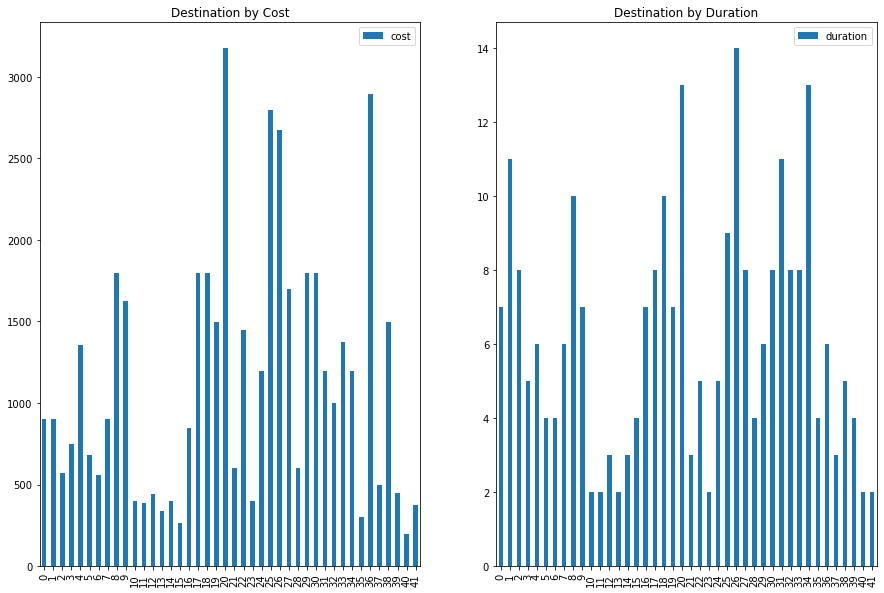

In [12]:
# visualisasi destination berdasarkan cost dan duration
fig, axs = plt.subplots(1,2, figsize=(15,10))
my_plot = data[['destination', 'cost']].plot(kind='bar', title="Destination by Cost", ax=axs[0])
my_plot = data[['destination', 'duration']].plot(kind='bar', title="Destination by Duration", ax=axs[1])
plt.xticks(rotation=90)
plt.show()

In [13]:
# membuat objek linier program (LP) dengan atribut masalahnya adalah minimize -> karena ingin meminimasisasi biaya
prob = pulp.LpProblem('GoingOnVacation', LpMinimize)

In [14]:
# membuat variabel keputusan (banyaknya pilihan paket liburan yang ditawarkan)
decision_variables = []
for rownum, row in data.iterrows():
  variable = str('x' + str(rownum))
  variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1,cat= 'Integer') #make variables binary
  decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with Decision Variables:" + str(decision_variables))

Total number of decision_variables: 42
Array with Decision Variables:[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41]


Diperoleh sebanyak 42 variabel pilihan paket

In [15]:
# mendefinisikan fungsi tujuan (meminimumkan biaya trip)
total_cost = ""
for rownum, row in data.iterrows():
  for i, schedule in enumerate(decision_variables):
    if rownum == i:
      formula = row['cost']*schedule
      total_cost += formula

prob += total_cost
print ("Optimization function: " + str(total_cost))

Optimization function: 899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9


In [16]:
# mendefinisikan fungsi batasan: (paket yang dipilih tidak boleh lebih dari waktu yang tersedia untuk liburan yaitu 10 hari)
aval_vacation_days = 10
total_vacation_days = ""
for rownum, row in data.iterrows():
  for i, schedule in enumerate(decision_variables):
    if rownum == i:
      formula = row['duration']*schedule
      total_vacation_days += formula

prob += (total_vacation_days == aval_vacation_days)
print("Constrains: " + str(total_vacation_days))

Constrains: 7*x0 + 11*x1 + 2*x10 + 2*x11 + 3*x12 + 2*x13 + 3*x14 + 4*x15 + 7*x16 + 8*x17 + 10*x18 + 7*x19 + 8*x2 + 13*x20 + 3*x21 + 5*x22 + 2*x23 + 5*x24 + 9*x25 + 14*x26 + 8*x27 + 4*x28 + 6*x29 + 5*x3 + 8*x30 + 11*x31 + 8*x32 + 8*x33 + 13*x34 + 4*x35 + 6*x36 + 3*x37 + 5*x38 + 4*x39 + 6*x4 + 2*x40 + 2*x41 + 4*x5 + 4*x6 + 6*x7 + 10*x8 + 7*x9


In [17]:
# final format
print (prob)
prob.writeLP("GoingOnVacation.lp" )

GoingOnVacation:
MINIMIZE
899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9 + 0
SUBJECT TO
_C1: 7 x0 + 11 x1 + 2 x10 + 2 x11 + 3 x12 + 2 x13 + 3 x14 + 4 x15 + 7 x16
 + 8 x17 + 10 x18 + 7 x19 + 8 x2 + 13 x20 + 3 x21 + 5 x22 + 2 x23 + 5 x24
 + 9 x25 + 14 x26 + 8 x27 + 4 x28 + 6 x29 + 5 x3 + 8 x30 + 11 x31 + 8 x32
 + 8 x33 + 13 x34 + 4 x35 + 6 x36 + 3 x37 + 5 x38 + 4 x39 + 6 x4 + 2 x40
 + 2 x41 + 4 x5 + 4 x6 + 6 x7 + 10 x8 + 7 x9 = 10

VARIABLES
0 <= x0 <= 1 Integer
0 <= x1 <= 1 Integer
0 <= x10 <= 1 Integer
0 <= x11 <= 1 Integer
0 <= x12 <= 1 Integer
0 <= x13 <= 1 Integer
0 <= x14 <= 1 Integer
0 <= x15 <= 1 Integer
0 

[x0,
 x1,
 x10,
 x11,
 x12,
 x13,
 x14,
 x15,
 x16,
 x17,
 x18,
 x19,
 x2,
 x20,
 x21,
 x22,
 x23,
 x24,
 x25,
 x26,
 x27,
 x28,
 x29,
 x3,
 x30,
 x31,
 x32,
 x33,
 x34,
 x35,
 x36,
 x37,
 x38,
 x39,
 x4,
 x40,
 x41,
 x5,
 x6,
 x7,
 x8,
 x9]

Diperoleh hasil tujuan menimimumkan biaya berlibur dengan konstrain durasi waktu serta nilai variabel bertipe binary 0-1.

In [18]:
# Nilai optimasi
optimization_result = prob.solve()

print("Status:", LpStatus[optimization_result])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
  print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  762.0
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
x15 = 1.0
x16 = 0.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 0.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 0.0
x3 = 0.0
x30 = 0.0
x31 = 0.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
x35 = 1.0
x36 = 0.0
x37 = 0.0
x38 = 0.0
x39 = 0.0
x4 = 0.0
x40 = 1.0
x41 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0


#### Tabel Hasil Nilai Optimasi :

In [19]:
variable_name = []
variable_value = []

for v in prob.variables():
  variable_name.append(v.name)
  variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
  value = re.findall(r'(\d+)', row['variable'])
  df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by='variable')

#append results
for rownum, row in data.iterrows():
  for results_rownum, results_row in df.iterrows():
    if rownum == results_row['variable']:
      data.loc[rownum, 'decision'] = results_row['value']

data

,destination,duration,cost,description,decision
0,Baja,7,899,Hike Bike and Sea Kayak and more on a Remote P...,0.0
1,Nepal,11,899,Explore the land and culture of the Himalayas....,0.0
2,Spain,8,568,Sport climb & deep water solo in Mallorca. Dis...,0.0
3,Yosemite,5,750,Guided hiking through stunning high country. E...,0.0
4,Utah,6,1356,Hike. Canyoneer. Rock Climb. and more!. Experi...,0.0
5,Utah,4,680,Ride mountain bike through Canyonlands. Follow...,0.0
6,San Juan Islands,4,559,Kayak in search of orca whales. Kayak amongst ...,0.0
7,Oregon,6,899,Circumnavigate Crater Lake. Experience the pri...,0.0
8,Hawaii,10,1799,Surf. Hike. Zipline. Swim. Snorkel. And more!....,0.0
9,Alaska,7,1625,Wilderness Packrafting. Packrafting is quickly...,0.0


In [20]:
# filter destinasi yang akan dipilih untuk menyelesaikan permasalahan (destinasi dengan decision bernilai ‘1’)
data[data['decision'] == 1]


,destination,duration,cost,description,decision
15,Maine,4,265,Ride endless singletrack. Escape to Western Ma...,1.0
35,Oregon,4,299,Mountain bike from hut-to-hut on the Mt Hood L...,1.0
40,Oregon,2,198,Learn to windsurf in Hood River. Trip for 2!. ...,1.0


Maka paket liburan yang dipilih yaitu paket destination ke Maine selama (duration) 4 hari dengan biaya (cost) sebesar 265 dollar, destination ke Oregon selama (duration) 4 hari dengan biaya (cost) sebesar 299 dollar, dan destination ke Oregon selama (duration) 2 hari dengan biaya (cost) sebesar 19 dollar

In [21]:
# Total biaya liburan
data[data['decision'] == 1]['cost'].sum(axis=0)

762

Biaya liburan paling minimum yang dihabiskan selama 10 hari dengan pilihan paket tersebut sebesar 762 dollar.